<a href="https://colab.research.google.com/github/dedemasutti/Python-para-mercado-financeiro/blob/main/taxas_de_retorno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PYTHON PARA MERCADO FINANCEIRO

IMPORTAÇÃO DAS BIBLIOTECAS E DADOS

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
dados = pd.read_csv('acoes.csv')

In [3]:
dados.shape

(648, 7)

In [4]:
dados

,Date,USIMINAS,ITAU,TOTVS,JHFS,WEG,BOVA11.SA
0,2020-01-02,9.70,38.029999,23.049999,7.60,17.620001,114.239998
1,2020-01-03,9.60,37.630001,23.540001,8.12,17.395000,113.800003
2,2020-01-06,9.42,37.070000,23.003332,8.16,17.440001,112.589996
3,2020-01-07,9.51,36.209999,23.100000,8.23,17.575001,112.239998
4,2020-01-08,9.39,35.619999,22.790001,8.10,16.910000,111.949997
...,...,...,...,...,...,...,...
643,2022-08-04,8.92,24.469999,27.600000,6.01,28.809999,102.480003
644,2022-08-05,8.76,24.930000,26.959999,5.90,28.830000,102.739998
645,2022-08-08,8.79,25.240000,28.219999,6.02,29.730000,104.800003
646,2022-08-09,8.97,25.900000,28.100000,5.90,29.580000,105.050003


## TAXA DE RETORNO SIMPLES

In [5]:
len(dados)

648

In [6]:
dados['ITAU'][0], dados['ITAU'][len(dados) - 1]

(38.02999877929688, 26.26000022888184)

In [7]:
((dados['ITAU'][len(dados) - 1] - dados['ITAU'][0]) / dados['ITAU'][0]) * 100

-30.949247773372274

In [8]:
((dados['USIMINAS'][len(dados) - 1] - dados['USIMINAS'][0]) / dados['USIMINAS'][0]) * 100

-5.979380774338335

In [9]:
((dados['WEG'][len(dados) - 1] - dados['WEG'][0]) / dados['WEG'][0]) * 100

74.68785028721183

In [10]:
((dados['JHFS'][len(dados) - 1] - dados['JHFS'][0]) / dados['JHFS'][0]) * 100

-15.263156078528805

In [11]:
((dados['TOTVS'][len(dados) - 1] - dados['TOTVS'][0]) / dados['TOTVS'][0]) * 100

34.44685812089496

In [12]:
((dados['BOVA11.SA'][len(dados) - 1] - dados['BOVA11.SA'][0]) / dados['BOVA11.SA'][0]) * 100

-6.932771636069048

In [13]:
#Outra maneira de escrever o código para chegar ao mesmo resultado acima
(dados['BOVA11.SA'][len(dados) - 1] / dados['BOVA11.SA'][0] - 1) * 100

-6.932771636069046

In [14]:
dados['WEG']

0      17.620001
1      17.395000
2      17.440001
3      17.575001
4      16.910000
         ...    
643    28.809999
644    28.830000
645    29.730000
646    29.580000
647    30.780001
Name: WEG, Length: 648, dtype: float64

In [15]:
# O método shift desloca o índice do DataFrame para o número que desejar
## No caso abaixo, indice 2
dados['WEG'].shift(2)

0            NaN
1            NaN
2      17.620001
3      17.395000
4      17.440001
         ...    
643    28.379999
644    28.120001
645    28.809999
646    28.830000
647    29.730000
Name: WEG, Length: 648, dtype: float64

In [16]:
#inclui o retorno simples ao dataset
dados['RS WEG'] = (dados['WEG'] / dados['WEG'].shift(1)) - 1

In [17]:
dados

,Date,USIMINAS,ITAU,TOTVS,JHFS,WEG,BOVA11.SA,RS WEG
0,2020-01-02,9.70,38.029999,23.049999,7.60,17.620001,114.239998,NaN
1,2020-01-03,9.60,37.630001,23.540001,8.12,17.395000,113.800003,-0.012770
2,2020-01-06,9.42,37.070000,23.003332,8.16,17.440001,112.589996,0.002587
3,2020-01-07,9.51,36.209999,23.100000,8.23,17.575001,112.239998,0.007741
4,2020-01-08,9.39,35.619999,22.790001,8.10,16.910000,111.949997,-0.037838
...,...,...,...,...,...,...,...,...
643,2022-08-04,8.92,24.469999,27.600000,6.01,28.809999,102.480003,0.024538
644,2022-08-05,8.76,24.930000,26.959999,5.90,28.830000,102.739998,0.000694
645,2022-08-08,8.79,25.240000,28.219999,6.02,29.730000,104.800003,0.031217
646,2022-08-09,8.97,25.900000,28.100000,5.90,29.580000,105.050003,-0.005045


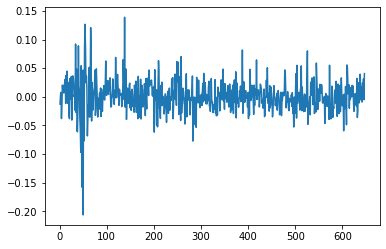

In [18]:
# Visualiza a taxa de retorno diaria da ação
dados['RS WEG'].plot();

In [19]:
# Indica média diária de retorno
dados['RS WEG'].mean()

0.0012808557130368616

In [20]:
dados.head(246)

,Date,USIMINAS,ITAU,TOTVS,JHFS,WEG,BOVA11.SA,RS WEG
0,2020-01-02,9.70,38.029999,23.049999,7.60,17.620001,114.239998,NaN
1,2020-01-03,9.60,37.630001,23.540001,8.12,17.395000,113.800003,-0.012770
2,2020-01-06,9.42,37.070000,23.003332,8.16,17.440001,112.589996,0.002587
3,2020-01-07,9.51,36.209999,23.100000,8.23,17.575001,112.239998,0.007741
4,2020-01-08,9.39,35.619999,22.790001,8.10,16.910000,111.949997,-0.037838
...,...,...,...,...,...,...,...,...
241,2020-12-18,14.39,31.660000,28.219999,7.85,36.435001,113.500000,-0.038274
242,2020-12-21,14.24,31.100000,28.100000,7.69,36.005001,111.430000,-0.011802
243,2020-12-22,13.97,31.250000,27.660000,7.47,36.410000,112.250000,0.011248
244,2020-12-23,14.62,31.940001,27.809999,7.50,36.310001,113.139999,-0.002746


In [21]:
# Esse código afere a taxa de retorno anual da ação
(dados['RS WEG'].mean() * 246) * 100

31.509050540706795

In [22]:
#faz a taxa de retorno simples e adiciona no dataset as colunas referentes a taxa
dados['RS USIMINAS'] = (dados['USIMINAS'] / dados['USIMINAS'].shift(1)) - 1
dados['RS ITAU'] = (dados['ITAU'] / dados['ITAU'].shift(1)) - 1
dados['RS WEG'] = (dados['WEG'] / dados['WEG'].shift(1)) - 1
dados['RS JHFS'] = (dados['JHFS'] / dados['JHFS'].shift(1)) - 1
dados['RS TOTVS'] = (dados['TOTVS'] / dados['TOTVS'].shift(1)) - 1
dados['RS BOVA11.SA'] = (dados['BOVA11.SA'] / dados['BOVA11.SA'].shift(1)) - 1

In [23]:
dados

,Date,USIMINAS,ITAU,TOTVS,JHFS,WEG,BOVA11.SA,RS WEG,RS USIMINAS,RS ITAU,RS JHFS,RS TOTVS,RS BOVA11.SA
0,2020-01-02,9.70,38.029999,23.049999,7.60,17.620001,114.239998,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,9.60,37.630001,23.540001,8.12,17.395000,113.800003,-0.012770,-0.010309,-0.010518,0.068421,0.021258,-0.003851
2,2020-01-06,9.42,37.070000,23.003332,8.16,17.440001,112.589996,0.002587,-0.018750,-0.014882,0.004926,-0.022798,-0.010633
3,2020-01-07,9.51,36.209999,23.100000,8.23,17.575001,112.239998,0.007741,0.009554,-0.023199,0.008578,0.004202,-0.003109
4,2020-01-08,9.39,35.619999,22.790001,8.10,16.910000,111.949997,-0.037838,-0.012618,-0.016294,-0.015796,-0.013420,-0.002584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2022-08-04,8.92,24.469999,27.600000,6.01,28.809999,102.480003,0.024538,0.056872,0.024278,0.061838,0.015826,0.022755
644,2022-08-05,8.76,24.930000,26.959999,5.90,28.830000,102.739998,0.000694,-0.017937,0.018799,-0.018303,-0.023188,0.002537
645,2022-08-08,8.79,25.240000,28.219999,6.02,29.730000,104.800003,0.031217,0.003425,0.012435,0.020339,0.046736,0.020051
646,2022-08-09,8.97,25.900000,28.100000,5.90,29.580000,105.050003,-0.005045,0.020478,0.026149,-0.019934,-0.004252,0.002385


TAXA DE RETORNO ANUAL

In [24]:
(dados['RS USIMINAS'].mean() * 246) * 100

15.047814403940126

In [25]:
(dados['RS ITAU'].mean() * 246) * 100

-6.632830559695623

In [26]:
(dados['RS WEG'].mean() * 246) * 100

31.509050540706795

In [27]:
(dados['RS JHFS'].mean() * 246) * 100

9.785129404457615

In [28]:
(dados['RS TOTVS'].mean() * 246) * 100

23.20881420873807

In [29]:
(dados['RS BOVA11.SA'].mean() * 246) * 100

2.253864429550423

TAXA DE RETORNO LOGARÍTMICA

In [30]:
dados['ITAU'][0], dados['ITAU'][len(dados) - 1]

(38.02999877929688, 26.26000022888184)

In [31]:
#Vamos usar um recurso do numpy que é np.log
np.log(dados['USIMINAS'][len(dados) - 1] / dados['USIMINAS'][0]) * 100



-6.165607430805535

In [32]:
np.log(dados['ITAU'][len(dados) - 1] / dados['ITAU'][0] * 100 )

4.234841773736987

In [33]:
np.log(dados['TOTVS'][len(dados) - 1] / dados['TOTVS'][0] * 100 )

4.901169014058749

In [34]:
np.log(dados['JHFS'][len(dados) - 1] / dados['JHFS'][0] * 100 )

4.439550500245579

In [35]:
np.log(dados['WEG'][len(dados) - 1] / dados['WEG'][0] * 100 )

5.163000668569372

In [36]:
np.log(dados['BOVA11.SA'][len(dados) - 1] / dados['BOVA11.SA'][0] * 100 )

4.533322117630952

# Retorno da carteira de ações

In [37]:
dados = pd.read_csv('acoes.csv')
dados.head

<bound method NDFrame.head of            Date  USIMINAS       ITAU      TOTVS  JHFS        WEG   BOVA11.SA
0    2020-01-02      9.70  38.029999  23.049999  7.60  17.620001  114.239998
1    2020-01-03      9.60  37.630001  23.540001  8.12  17.395000  113.800003
2    2020-01-06      9.42  37.070000  23.003332  8.16  17.440001  112.589996
3    2020-01-07      9.51  36.209999  23.100000  8.23  17.575001  112.239998
4    2020-01-08      9.39  35.619999  22.790001  8.10  16.910000  111.949997
..          ...       ...        ...        ...   ...        ...         ...
643  2022-08-04      8.92  24.469999  27.600000  6.01  28.809999  102.480003
644  2022-08-05      8.76  24.930000  26.959999  5.90  28.830000  102.739998
645  2022-08-08      8.79  25.240000  28.219999  6.02  29.730000  104.800003
646  2022-08-09      8.97  25.900000  28.100000  5.90  29.580000  105.050003
647  2022-08-10      9.12  26.260000  30.990000  6.44  30.780001  106.320000

[648 rows x 7 columns]>

In [38]:
#código para normalização do dataset
dados_normalizados = dados.copy()
for i in dados_normalizados.columns[1:]:
    dados_normalizados[i] = (dados_normalizados[i] / dados_normalizados[i][0])

In [39]:
dados_normalizados.head(10)

,Date,USIMINAS,ITAU,TOTVS,JHFS,WEG,BOVA11.SA
0,2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2020-01-03,0.989691,0.989482,1.021258,1.068421,0.987230,0.996149
2,2020-01-06,0.971134,0.974757,0.997975,1.073684,0.989784,0.985557
3,2020-01-07,0.980412,0.952143,1.002169,1.082895,0.997446,0.982493
4,2020-01-08,0.968041,0.936629,0.988720,1.065790,0.959705,0.979954
5,2020-01-09,0.961856,0.917960,1.005061,1.069737,0.945516,0.977416
6,2020-01-10,0.942268,0.909808,0.997542,1.073684,0.964813,0.974090
7,2020-01-13,0.983505,0.921904,1.007231,1.105263,0.973893,0.989846
8,2020-01-14,0.987629,0.921904,1.007231,1.132895,0.993190,0.991947
9,2020-01-15,0.968041,0.910597,1.009689,1.151316,0.999716,0.981968


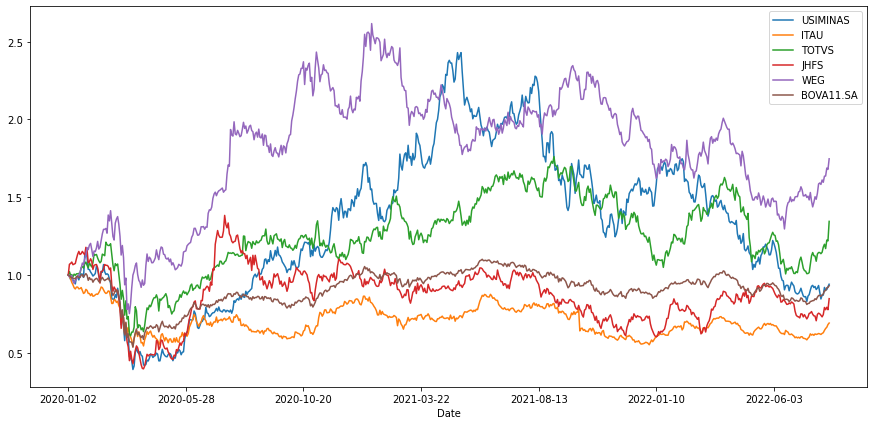

In [40]:
#Representação gráfica usando o método plot
dados_normalizados.plot(x = 'Date', figsize=(15,7))

In [41]:
dados_normalizados.drop(labels=['Date'], axis=1, inplace = True)

In [42]:
# O método shift tem a função de usar sempre a data do dia anterior afim de calcular o retorno diário
retorno_carteira = (dados_normalizados / dados_normalizados.shift(1)) -1
retorno_carteira 

,USIMINAS,ITAU,TOTVS,JHFS,WEG,BOVA11.SA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.010309,-0.010518,0.021258,0.068421,-0.012770,-0.003851
2,-0.018750,-0.014882,-0.022798,0.004926,0.002587,-0.010633
3,0.009554,-0.023199,0.004202,0.008578,0.007741,-0.003109
4,-0.012618,-0.016294,-0.013420,-0.015796,-0.037838,-0.002584
...,...,...,...,...,...,...
643,0.056872,0.024278,0.015826,0.061838,0.024538,0.022755
644,-0.017937,0.018799,-0.023188,-0.018303,0.000694,0.002537
645,0.003425,0.012435,0.046736,0.020339,0.031217,0.020051
646,0.020478,0.026149,-0.004252,-0.019934,-0.005045,0.002385


In [43]:
# Calcula retorno anual 
retorno_anual = retorno_carteira.mean() * 246
retorno_anual


USIMINAS     0.150478
ITAU        -0.066328
TOTVS        0.232088
JHFS         0.097851
WEG          0.315091
BOVA11.SA    0.022539
dtype: float64

In [44]:
# Depois de calculdo o retorno anual, fazemos a taxa percentual multiplicando o resultado por 100
retorno_anual = retorno_anual * 100
retorno_anual

USIMINAS     15.047814
ITAU         -6.632831
TOTVS        23.208814
JHFS          9.785129
WEG          31.509051
BOVA11.SA     2.253864
dtype: float64

# Calculo de retorno das ações por peso de cada ação

In [45]:
peso_carteira_01 = np.array([0.2, 0.2 ,0.2, 0.2, 0.2, 0.0])
peso_carteira_01.sum()

1.0

In [46]:
# O método dot multiplica e faz o somatório do conjunto
np.dot(retorno_anual, peso_carteira_01)

14.583595599629408

In [47]:
# Calcular taxa de retorno para ações com pesos distintos
peso_carteira_02 = np.array([0.2, 0.1, 0.3, 0.2, 0.3, 0.0])
peso_carteira_02.sum()

1.1

In [48]:
# Adicionando um peso maior para ações que mais tiveram retorno, a taxa de retorno aumenta
np.dot(retorno_anual, peso_carteira_02)

20.718665130543453

In [49]:
dados = pd.read_csv('acoes.csv')
dados_normalizados = dados.copy()
for i in dados_normalizados.columns[1:]:
    dados_normalizados[i] = (dados_normalizados[i] / dados_normalizados[i][0])

In [50]:
dados_normalizados.head()

,Date,USIMINAS,ITAU,TOTVS,JHFS,WEG,BOVA11.SA
0,2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2020-01-03,0.989691,0.989482,1.021258,1.068421,0.987230,0.996149
2,2020-01-06,0.971134,0.974757,0.997975,1.073684,0.989784,0.985557
3,2020-01-07,0.980412,0.952143,1.002169,1.082895,0.997446,0.982493
4,2020-01-08,0.968041,0.936629,0.988720,1.065790,0.959705,0.979954


In [51]:
dados_normalizados['CARTEIRA'] = (dados_normalizados['USIMINAS'] + dados_normalizados['ITAU'] + dados_normalizados['TOTVS'] + dados_normalizados['JHFS'] + dados_normalizados['WEG'])/ 5
dados_normalizados

,Date,USIMINAS,ITAU,TOTVS,JHFS,WEG,BOVA11.SA,CARTEIRA
0,2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2020-01-03,0.989691,0.989482,1.021258,1.068421,0.987230,0.996149,1.011216
2,2020-01-06,0.971134,0.974757,0.997975,1.073684,0.989784,0.985557,1.001467
3,2020-01-07,0.980412,0.952143,1.002169,1.082895,0.997446,0.982493,1.003013
4,2020-01-08,0.968041,0.936629,0.988720,1.065790,0.959705,0.979954,0.983777
...,...,...,...,...,...,...,...,...
643,2022-08-04,0.919588,0.643439,1.197397,0.790790,1.635074,0.897059,1.037257
644,2022-08-05,0.903093,0.655535,1.169631,0.776316,1.636209,0.899335,1.028157
645,2022-08-08,0.906186,0.663687,1.224295,0.792105,1.687287,0.917367,1.054712
646,2022-08-09,0.924742,0.681041,1.219089,0.776316,1.678774,0.919555,1.055992


In [52]:
# Esse código imprime um gráfico interativo mostrando as taxas de retorno diárias da carteira de ações e do indice BOVESPA
figura = px.line(title = 'CARTEIRA X BOVA')
for i in dados_normalizados.columns[1:]:
  figura.add_scatter(x = dados_normalizados['Date'], y = dados_normalizados[i], name = i)
  figura.show()

In [53]:
dados_normalizados.drop(['ITAU', 'USIMINAS','TOTVS','JHFS', 'WEG'], axis = 1 , inplace = True)
dados_normalizados

,Date,BOVA11.SA,CARTEIRA
0,2020-01-02,1.000000,1.000000
1,2020-01-03,0.996149,1.011216
2,2020-01-06,0.985557,1.001467
3,2020-01-07,0.982493,1.003013
4,2020-01-08,0.979954,0.983777
...,...,...,...
643,2022-08-04,0.897059,1.037257
644,2022-08-05,0.899335,1.028157
645,2022-08-08,0.917367,1.054712
646,2022-08-09,0.919555,1.055992


In [54]:
figura = px.line(title = 'CARTEIRA X BOVA')
for i in dados_normalizados.columns[1:]:
  figura.add_scatter(x = dados_normalizados['Date'], y = dados_normalizados[i], name = i)
  figura.show()